## 0. Librerias

In [ ]:
#!pip install pandas numpy seaborn matplotlib
#!pip install dython

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------------- ---------------------- 5.0/11.1 MB 60.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 29.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.2 MB ? eta -:--:--
   --------------- ------------------------ 16.3/41.2 MB 39.4 MB/s eta 0:00:01
   -------------------------------- ------- 33.6/41.2 MB 54.7 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 50.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip freeze

### 1. Cargue de los datos

In [3]:
path_df = "C:/MLOPS/clase_mlops/Proyecto_1/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(path_df)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
columns = df.columns

In [26]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1.1 Descriptivos basicos

In [28]:
# Get the categorical summary statistics of the dataset
df.describe(exclude = 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


1.3 Variable ojetivo

In [5]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

1.4 Casteo de variables

In [6]:
#Covertir datos categorico a numerico 
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [7]:
#convertir datos de numerico a categorico 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

In [8]:
df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
df['ChurnTarget'].value_counts(normalize=True)

ChurnTarget
0    0.73463
1    0.26537
Name: proportion, dtype: float64

### 2. Exploración de datos

2.1 Descriptivos Variables numericas

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

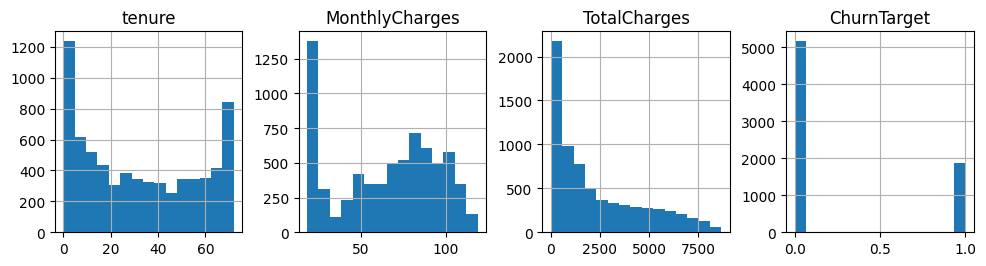

In [9]:
num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

2.2 Variables Categoricas

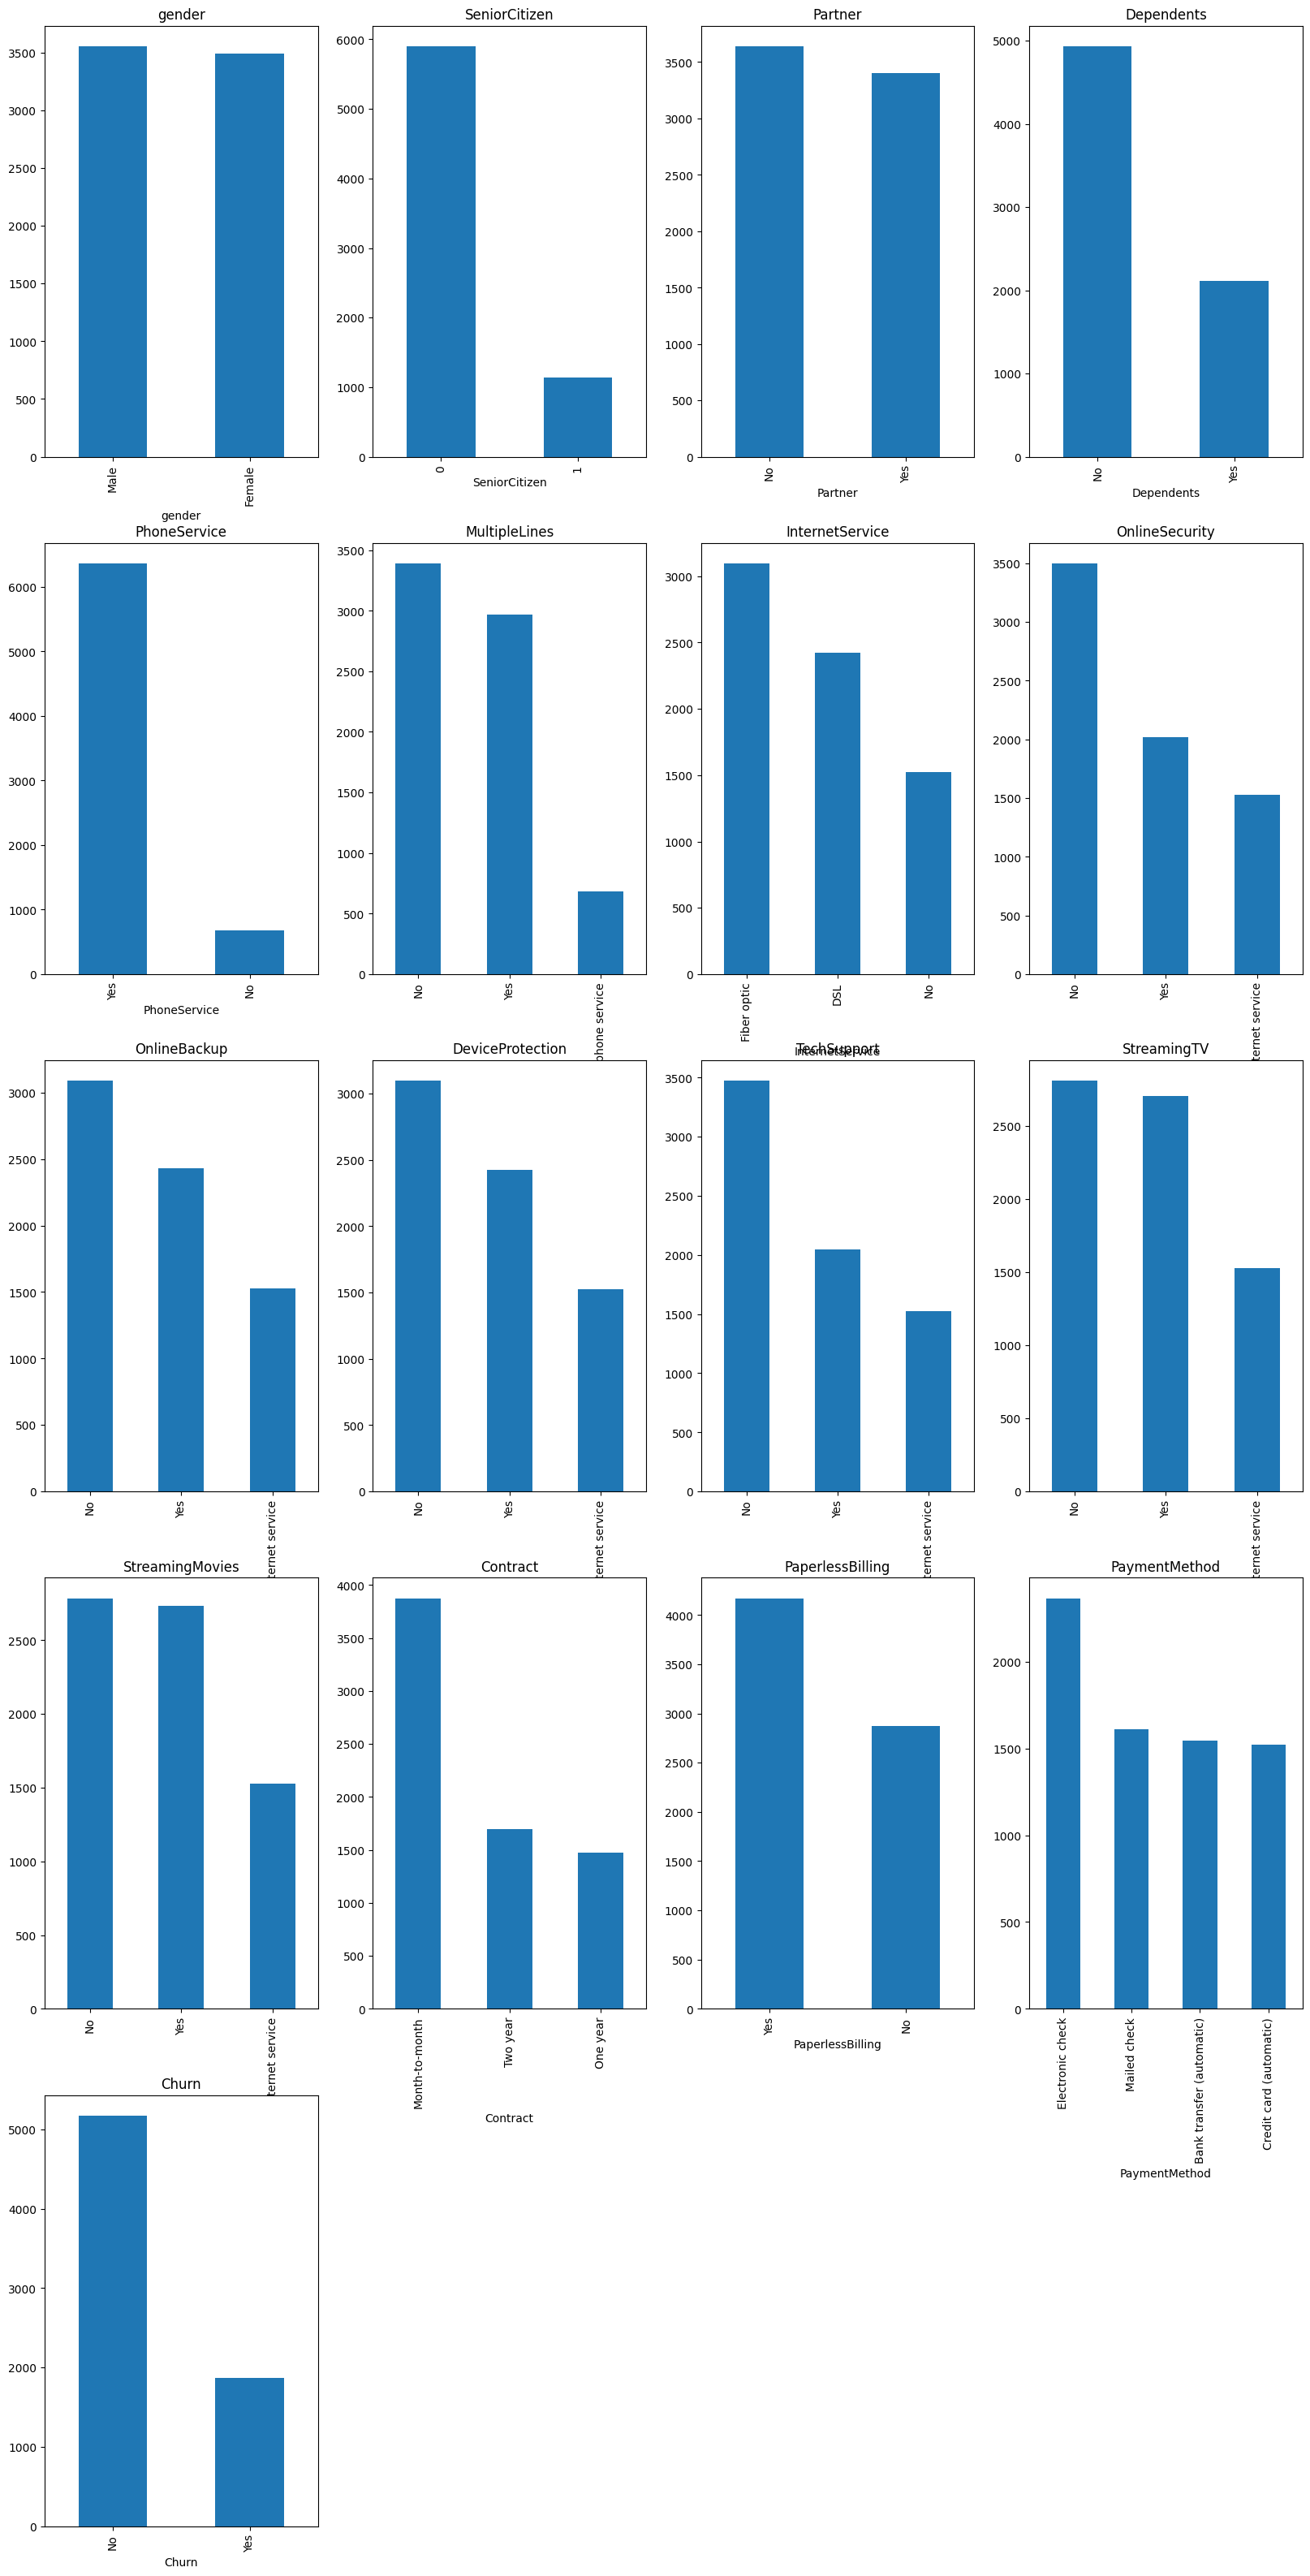

In [10]:
cat_features = df.drop('customerID', axis =1).select_dtypes(include='object').columns

plt.figure(figsize=(20, 40))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

2.3 Correlacines

Text(0.5, 1.0, 'Correlation Heatmap')

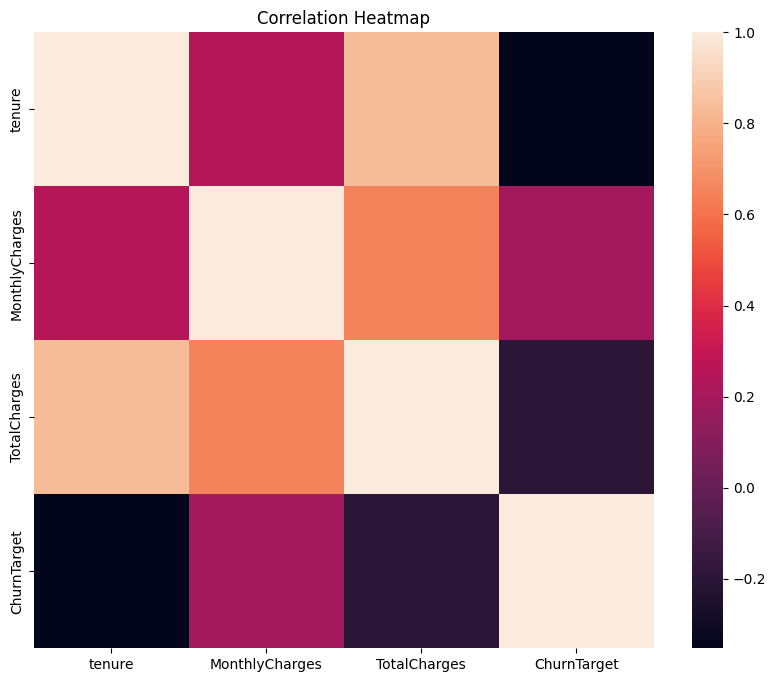

In [35]:
# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

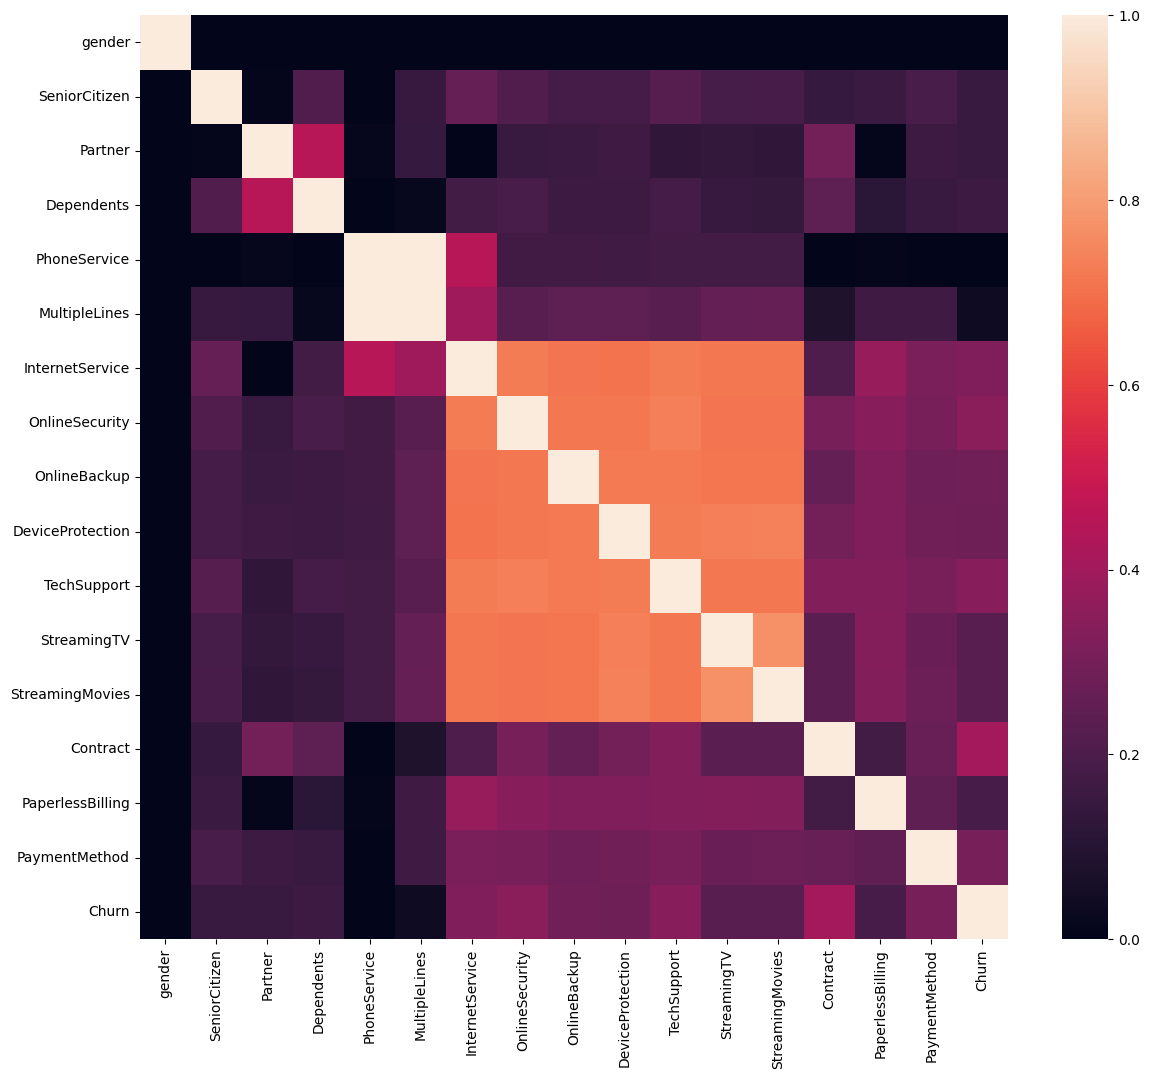

In [16]:
from dython.nominal import associations

# Calculate the Cramer’s V and correlation matrix
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

2.4 Detección de outliers

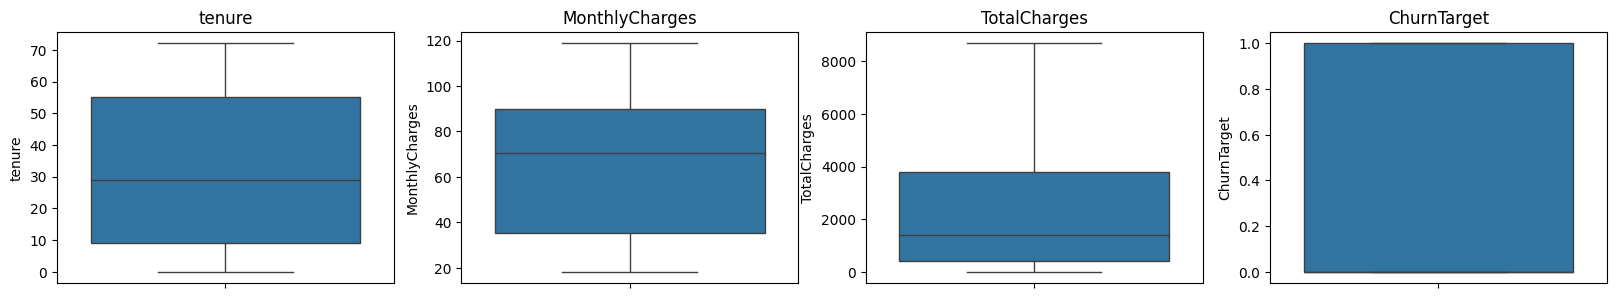

In [37]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

2.5 Comportamiento de las caracteristicas contra la VO

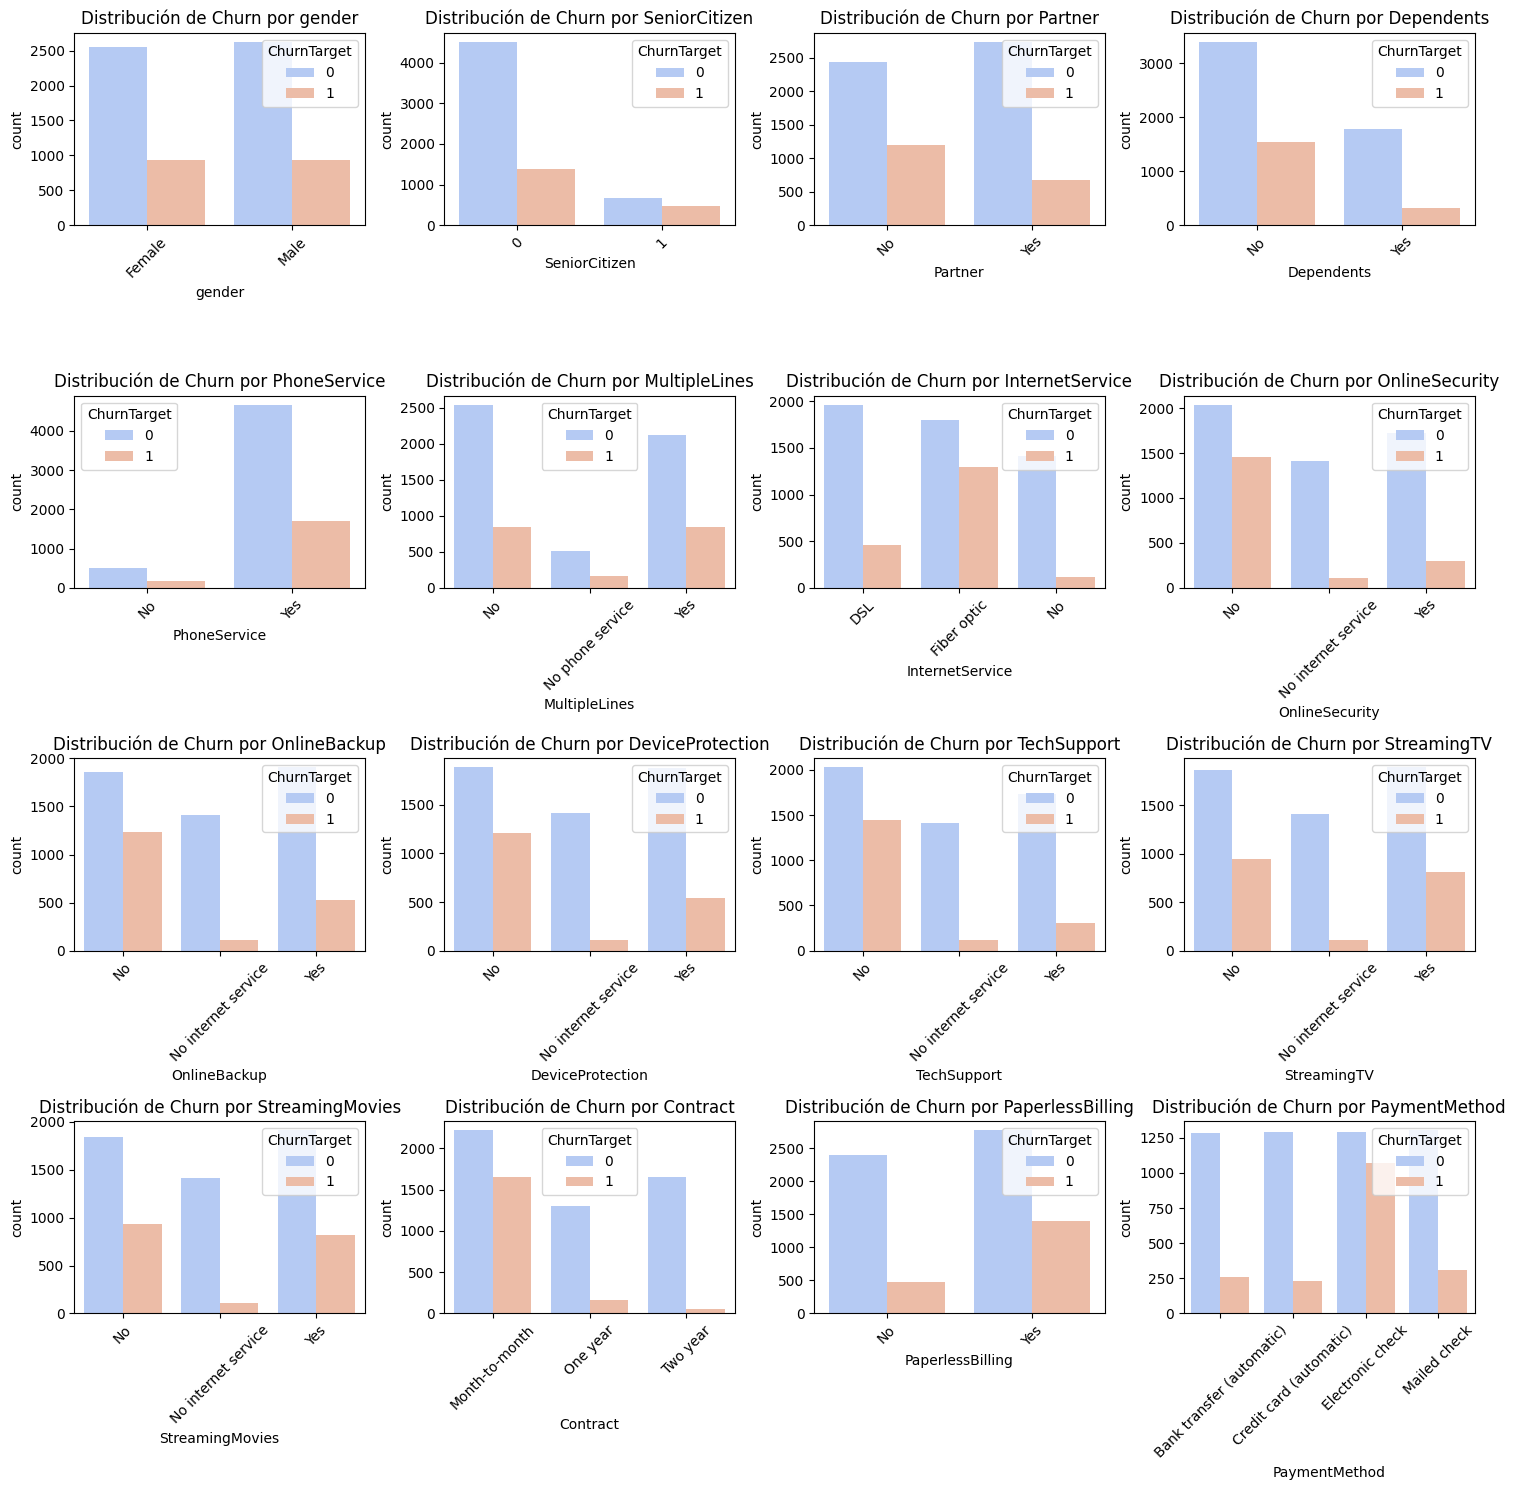

In [17]:
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]
df[categorical_cols] = df[categorical_cols].astype("category")

# **Análisis de variables categóricas vs ChurnTarget**
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, hue="ChurnTarget", palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de Churn por {col}")

plt.tight_layout()
plt.show()




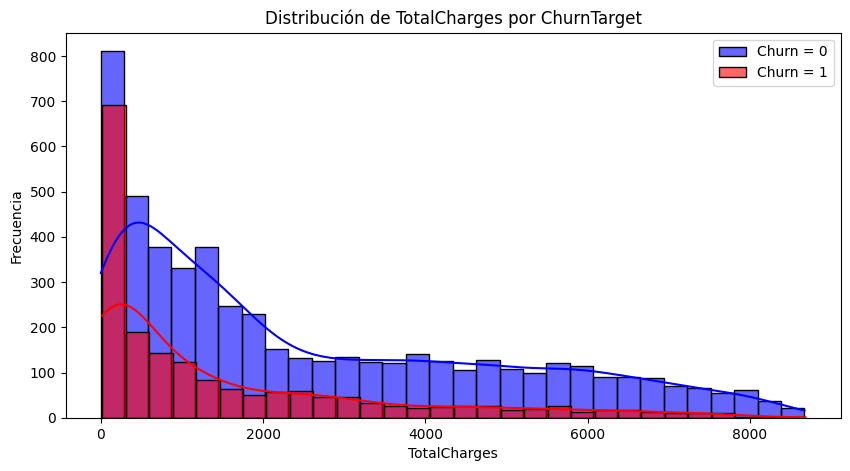

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["ChurnTarget"] == 0]["TotalCharges"], bins=30, color="blue", label="Churn = 0", alpha=0.6, kde=True)
sns.histplot(df[df["ChurnTarget"] == 1]["TotalCharges"], bins=30, color="red", label="Churn = 1", alpha=0.6, kde=True)
plt.xlabel("TotalCharges")
plt.ylabel("Frecuencia")
plt.title("Distribución de TotalCharges por ChurnTarget")
plt.legend()
plt.show()

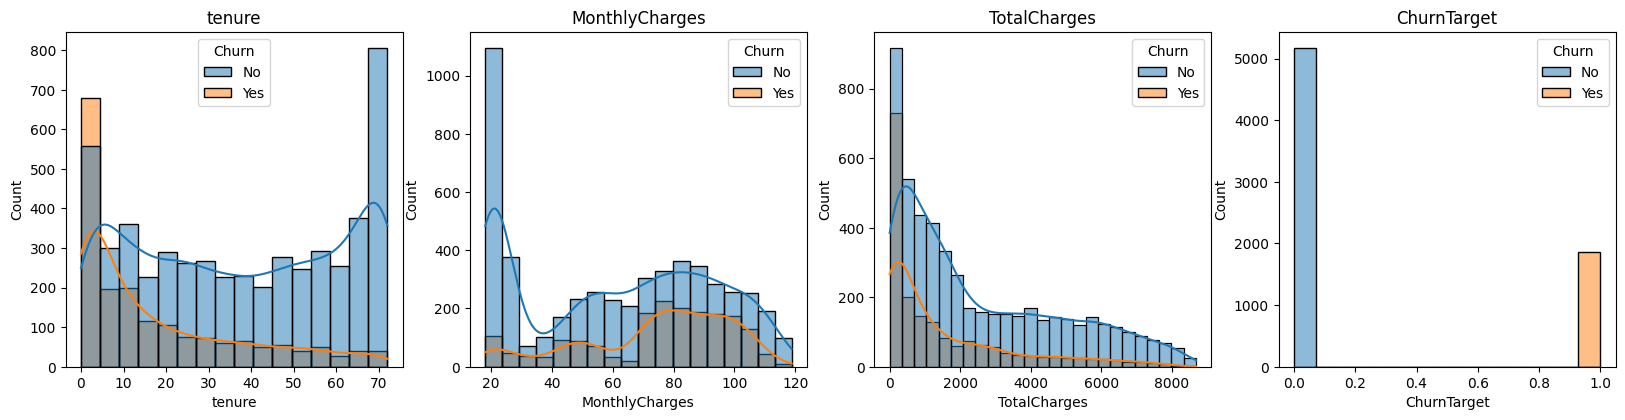

In [40]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(x=col, hue='Churn', data=df, kde=True)
    plt.title(col)

### 3. Feature Selection

3.1  Selección de variables numericas

In [18]:
target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()
print(selected_num_features)

['tenure']


3.2 Seleccion de variables categoricas

In [19]:
categorical_target = 'Churn'

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]
print(selected_cat_features)

['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


3.3 Variables finales para modelamiento

In [20]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


# Modelado

## 4.1 Modelo Base

### 4.1.1 paritición del Dataset

In [21]:
from sklearn.model_selection import train_test_split

target = 'ChurnTarget' 

X = df[selected_features]
y = df[target]

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

#Splitting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

### 4.1.2 Modelo inicial regresión logistica

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
# Prepare the preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### 4.1.3 Evaluación

In [23]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



### 4.1.4 Gráficas

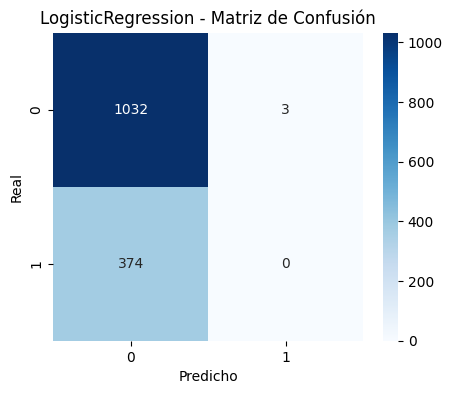

In [26]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

model_name = "LogisticRegression"

y_pred = pipeline.predict(X_test)
y_scores = pipeline.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"{model_name} - Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

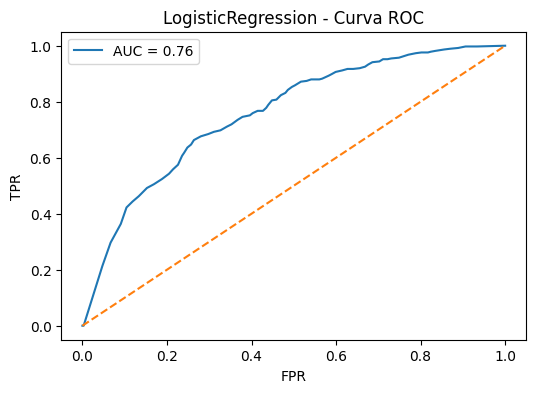

In [27]:
#Curva ROC

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title(f"{model_name} - Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

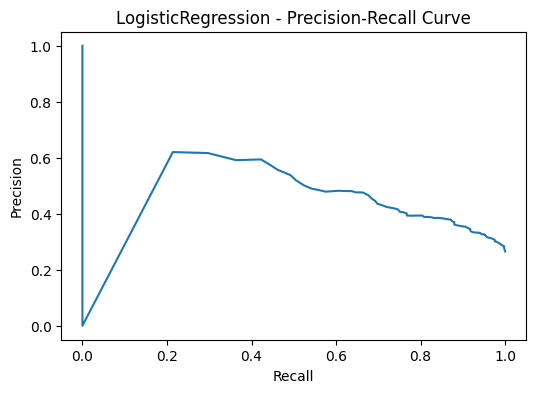

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.title(f"{model_name} - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

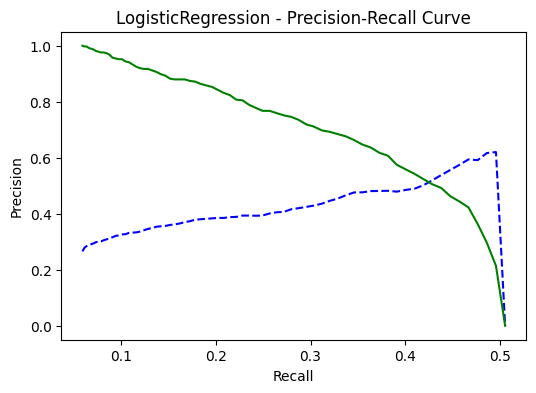

In [29]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(6, 4))
plt.plot(_, precision[:-1], "b--", label ="Precision")
plt.plot(_, recall[:-1], "g-", label ="Recall")
plt.title(f"{model_name} - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [31]:
def plot_feature_importance(model, feature_names, top_n=6, model_name="LogisticReg"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importancia")
    plt.title(f"{model_name} - Importancia de Variables")
    plt.show()

In [32]:
plot_feature_importance(pipeline, X.columns, top_n=6, model_name="LogisticReg")

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'